<a href="https://colab.research.google.com/github/roldugina/freecodecamp_data_analysis_projects/blob/main/sea_level_predictor/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.ticker import MultipleLocator
import numpy as np

In [108]:
df=pd.read_csv('https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/sea_level_predictor/epa-sea-level.csv')

In [109]:
years=df['Year'].to_numpy()
years_prognosis=np.linspace(years_max+1,years_pr_max,years_pr_max-years_max).astype(int)
years_2000=np.hstack((years[years>=2000],years_prognosis))
years_full=np.hstack((years,years_prognosis))

years_max=df['Year'].max()
years_pr_max=2050

In [110]:
res_general = st.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
res_prognosis=st.linregress(df[df['Year']>2000]['Year'],df[df['Year']>2000]['CSIRO Adjusted Sea Level'])


In [111]:
y_min=df['CSIRO Adjusted Sea Level'].min()-1
y_current=df['CSIRO Adjusted Sea Level'].max()+1
y_max=years_pr_max*res_prognosis.slope+res_prognosis.intercept+1

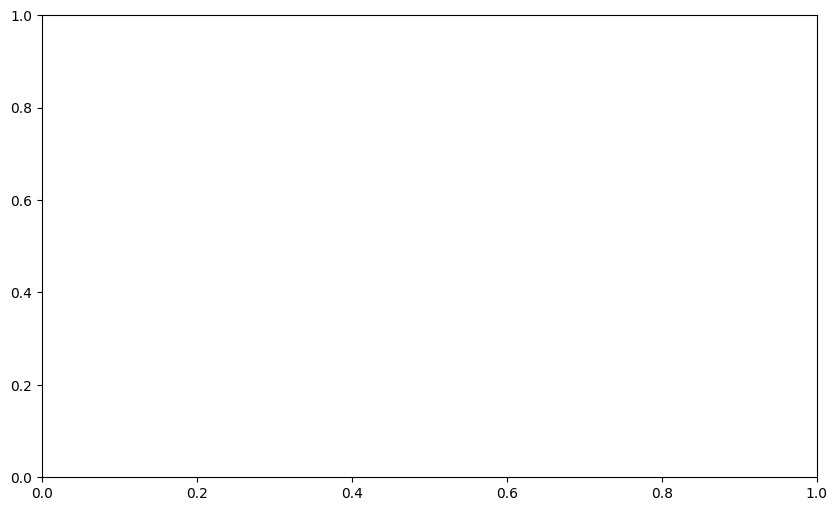

In [112]:
fig,ax=plt.subplots(figsize=(10,6))

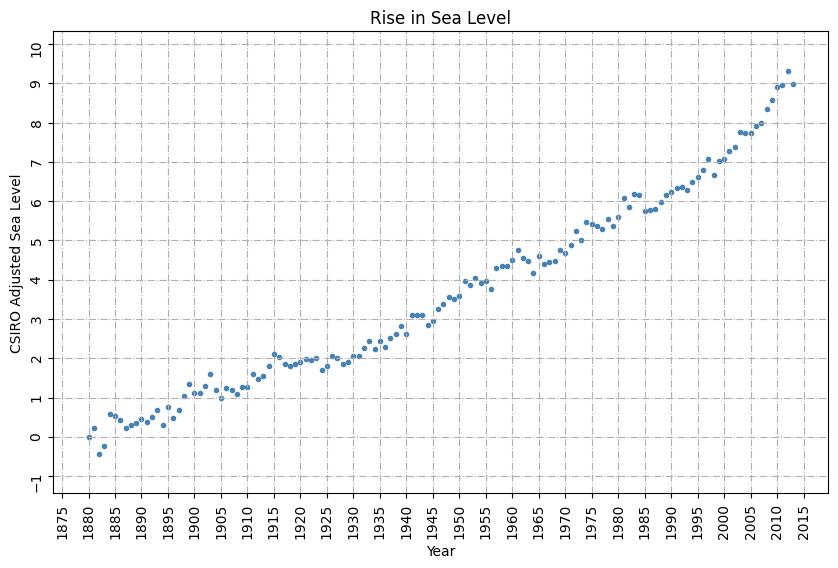

In [113]:
ax.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],color='steelblue',marker=".")

ax.set(xlabel='Year',ylabel='CSIRO Adjusted Sea Level',title='Rise in Sea Level',ylim=(y_min,y_current))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True, linestyle='-.')
ax.tick_params(labelrotation=90)
fig

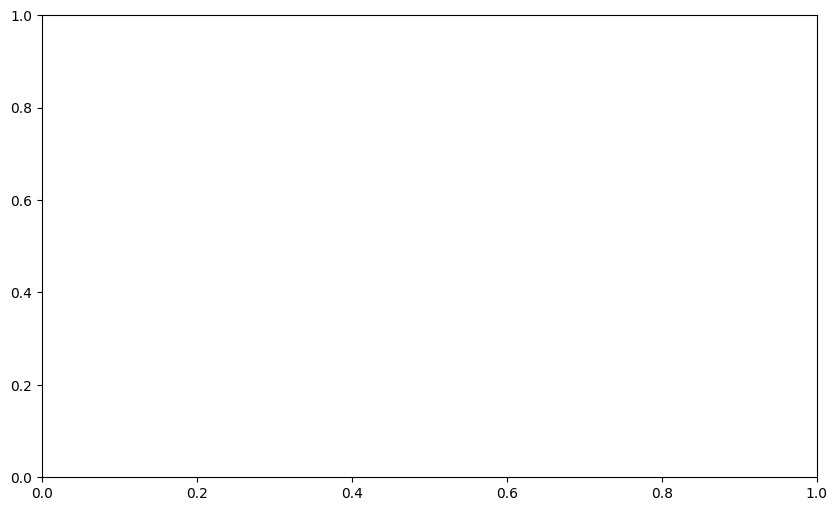

In [114]:
fig,ax=plt.subplots(figsize=(10,6))

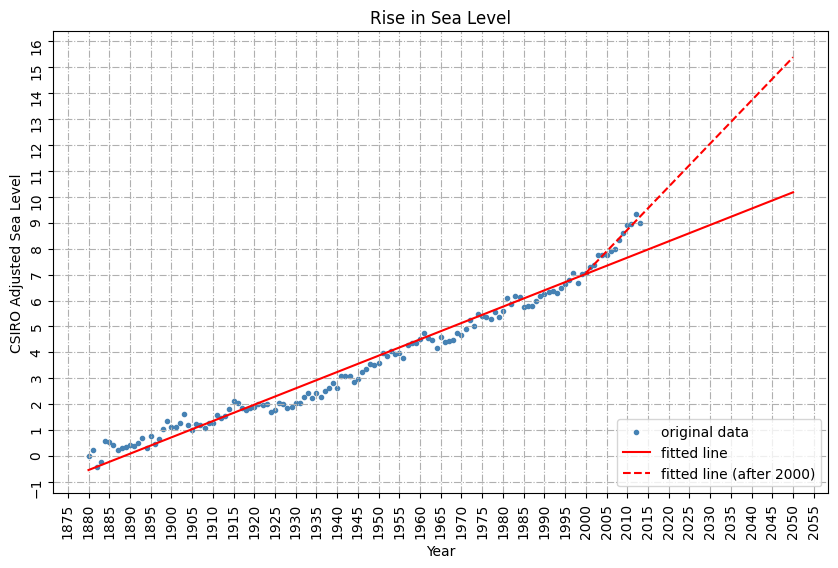

In [115]:
ax.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],color='steelblue',marker=".",label='original data')
ax.plot(years_full,years_full*res_general.slope+res_general.intercept,'r', label='fitted line')
ax.plot(years_2000,years_2000*res_prognosis.slope+res_prognosis.intercept,'r--', label='fitted line (after 2000)')

ax.set(xlabel='Year',ylabel='CSIRO Adjusted Sea Level',title='Rise in Sea Level',ylim=(y_min,y_max))

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True, linestyle='-.')
ax.tick_params(labelrotation=90)

ax.legend(loc='lower right')
fig